In [1]:
import numpy as np
import pandas as pd
import scipy.stats as scs
import matplotlib.pyplot as plt
%matplotlib inline

## Loading data

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Exploratory Data Analysis

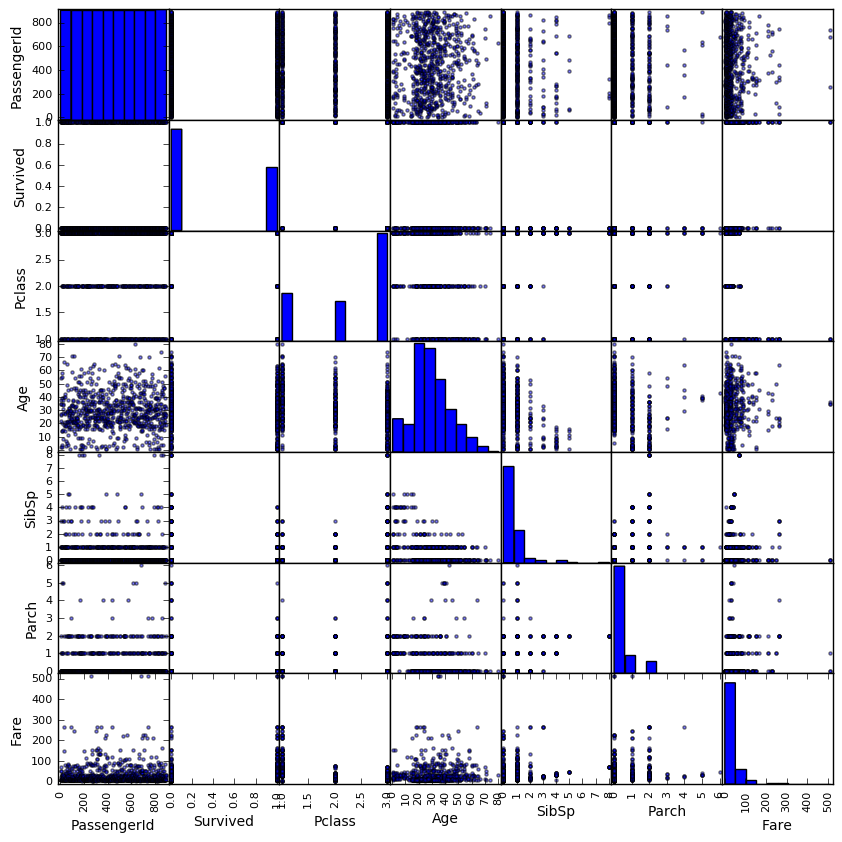

In [5]:
# Scatter_matrix
pd.scatter_matrix(df, figsize=(10, 10))
plt.show() # put this to hide lengthy output

Looks like there is no apparent relationship between any 2 variables

In [6]:
# Pop out the survived variable
y = df['Survived']

Let's try to plot this response by several different single predictors (numeric only, except Passenger ID)

In [10]:
# Get only float columns (note that 'Survived' is no longer there)
numeric_cols = [column for column in df.columns if df[column].dtype == 'float64']
numeric_cols

['Age', 'Fare']

### Age Effect

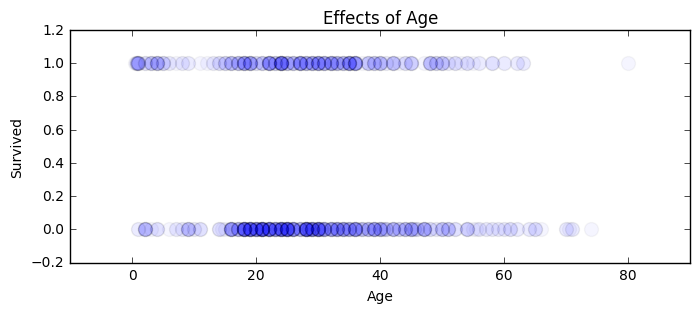

In [50]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(111)
ax1.scatter(df['Age'], y, alpha=0.04, s=100)
ax1.set_title('Effects of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Survived')

From plot, we can see that there are more people 18-40 (judging by the density of alpha level). Most likely because there was a lot more young adults than children and elderly. We want to see if the survival rate in each age group is significantly different.

Divide passengers into children (0-18), young adult (18-30), adult (30-40) and elderly (50-100). Yes, at the current time, we can say a 50-year-old is old.

In [114]:
# Get rid of null age
df_all_age = df[df['Age'].notnull()]

# Statistics of age
print df_all_age['Age'].mean(), df_all_age['Age'].std()

29.6991176471 14.5264973323


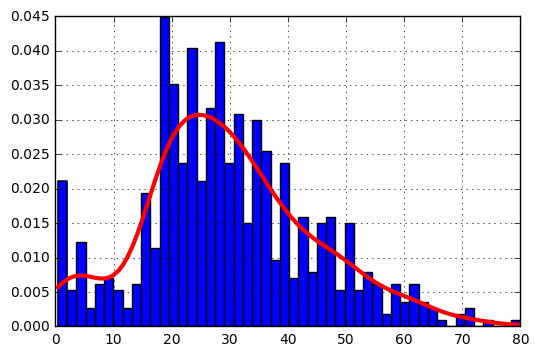

In [115]:
# Let's fit a Gaussian KDE to this data
my_pdf = scs.gaussian_kde(df_all_age['Age'])
x = np.linspace(df_all_age['Age'].min(), df_all_age['Age'].max(), 100)
# Plot histogram with KDE
df_all_age['Age'].hist(bins=50, normed=True)
plt.plot(x, my_pdf(x), linewidth=3, c='red')

In [70]:
# Create age groups
df_children = df_all_age[df_all_age['Age'] < 18]
df_young = df_all_age[(df_all_age['Age'] >= 18) & (df_all_age['Age'] <= 30)]
df_adult = df_all_age[(df_all_age['Age'] > 30) & (df_all_age['Age'] <= 50)]
df_old = df_all_age[df_all_age['Age'] > 50]

In [92]:
# Function to calculate survival rate
def survival_rate(df):
    return len(df[df['Survived'] == 1]) / float(len(df))

print survival_rate(df_children)
print survival_rate(df_young)
print survival_rate(df_adult)
print survival_rate(df_old)

print len(df_children), len(df_young), len(df_adult), len(df_old)

0.53982300885
0.35472972973
0.423236514523
0.34375
113 296 241 64


We can use ANOVA to test if the survival rates are different between groups. Also, we can regroup to make the test simpler. Since there are differences in the sizes of the groups, there should be more tests rather than eyeballing.

### Fare Effect

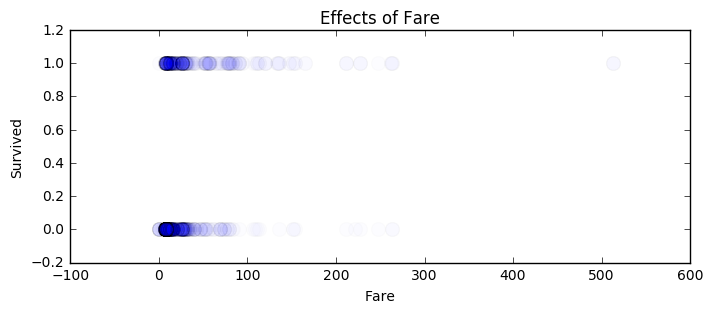

In [41]:
fig = plt.figure(figsize=(8,3))
ax2 = fig.add_subplot(111)
ax2.scatter(df['Fare'], y, alpha=0.01, s=100)
ax2.set_title('Effects of Fare')
ax2.set_xlabel('Fare')
ax2.set_ylabel('Survived')

plt.show()

We wouldl suspect that high-class passengers will be the first to be saved. But let's test if that theory is true.

From the graph, at first there is no significance in survival rate in the fare. But there is a group of people whose fare is the highest (> 500) who survived. We will look at that in more detail.

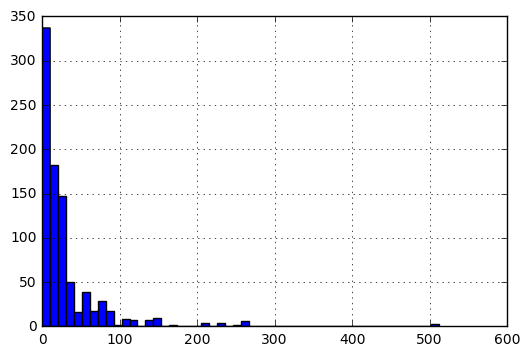

In [94]:
# Histogram of fare
df['Fare'].hist(bins=50)

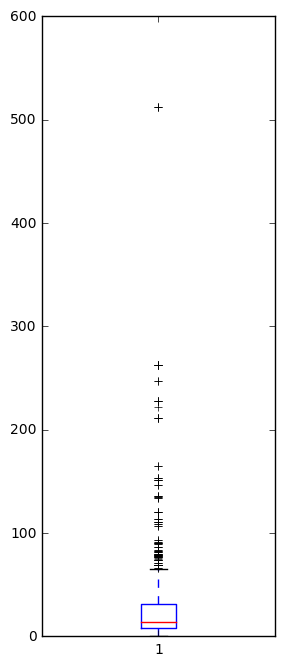

In [103]:
# Box plot fare
fig = plt.figure(figsize=(3,8))
plt.boxplot(df['Fare'])
plt.show()

In [ ]:
# Mean, 

### Gender Effect